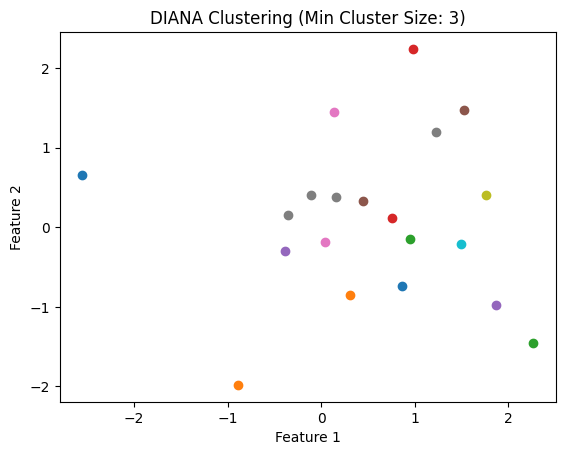

In [1]:
#lab 5
#Question no 1

import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration purposes
np.random.seed(0)
data = np.random.randn(20, 2)

# Calculate the Euclidean distance between two data points
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Recursive DIANA clustering function
def diana_clustering(data, min_cluster_size=1):
    n = data.shape[0]
    
    if n <= min_cluster_size:
        return [data]
    
    # Calculate the centroid of the data
    centroid = np.mean(data, axis=0)
    
    # Calculate the distances of data points to the centroid
    distances = [euclidean_distance(centroid, data[i]) for i in range(n)]
    
    # Find the index of the farthest data point from the centroid
    farthest_idx = np.argmax(distances)
    
    # Split the data into two clusters: one with the farthest point and one without
    cluster1 = data[farthest_idx].reshape(1, -1)
    cluster2 = np.delete(data, farthest_idx, axis=0)
    
    # Recursively apply DIANA clustering to both clusters
    clusters1 = diana_clustering(cluster1, min_cluster_size)
    clusters2 = diana_clustering(cluster2, min_cluster_size)
    
    return clusters1 + clusters2

# Perform DIANA clustering
min_cluster_size = 3
clusters = diana_clustering(data, min_cluster_size)

# Plot the data points and clusters
for cluster in clusters:
    cluster_data = np.vstack(cluster)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'DIANA Clustering (Min Cluster Size: {min_cluster_size})')
plt.show()
